In [76]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'delivery'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='0987654321',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/parsh/OneDrive/Desktop/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

db = connect_db()
cur = db.cursor()

In [78]:
!pip install matplotlib





In [79]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "0987654321",
                             database = "ecommerce")

cur = db.cursor()


# List all unique  cities where  customers are Located.

In [80]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [81]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 90202)

# Find the total sales per category.

In [24]:
import pandas as pd
import mysql.connector

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect to the database
db = connect_db()
cur = db.cursor()

# SQL query
query = """
SELECT products.product_category AS category, 
       ROUND(SUM(payments.payment_value), 2) AS sales
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
"""

# Execute and fetch
cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["Category", "Sales"])
print(df)

# Close connections
cur.close()
db.close()



                       Category        Sales
0                     perfumery   4053909.28
1          Furniture Decoration  11441411.13
2                     telephony   3895056.41
3                bed table bath  13700429.37
4                    automotive   6818354.65
..                          ...          ...
69               cds music dvds      9595.44
70                   La Cuisine     23308.24
71  Fashion Children's Clothing      6285.36
72                     PC Gamer     17395.44
73       insurance and services      2596.08

[74 rows x 2 columns]


In [ ]:
!pip install psycopg2-binary


# Calculate the percentage of orders that were paid in installments.

In [ ]:
pip install mysql-connector-python


In [26]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0987654321",
    database="ecommerce"
)

# Create cursor
cur = conn.cursor()

# Query to calculate percentage of installment payments
query = """
SELECT (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END)) / COUNT(*) * 100 AS installment_percentage
FROM payments
"""

# Execute query
cur.execute(query)
data = cur.fetchall()

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Installment Payment %"])
print("\n📊 Percentage of Orders Paid in Installments:\n")
print(df.round(2))  # round to 2 decimal places for better readability

# Optional: print a friendly message
print(f"\n✅ Around {data[0][0]:.2f}% of orders were paid in installments.")

# Close connection
cur.close()
conn.close()




📊 Percentage of Orders Paid in Installments:

  Installment Payment %
0               99.9981

✅ Around 100.00% of orders were paid in installments.


# Count the number of customer from each state.

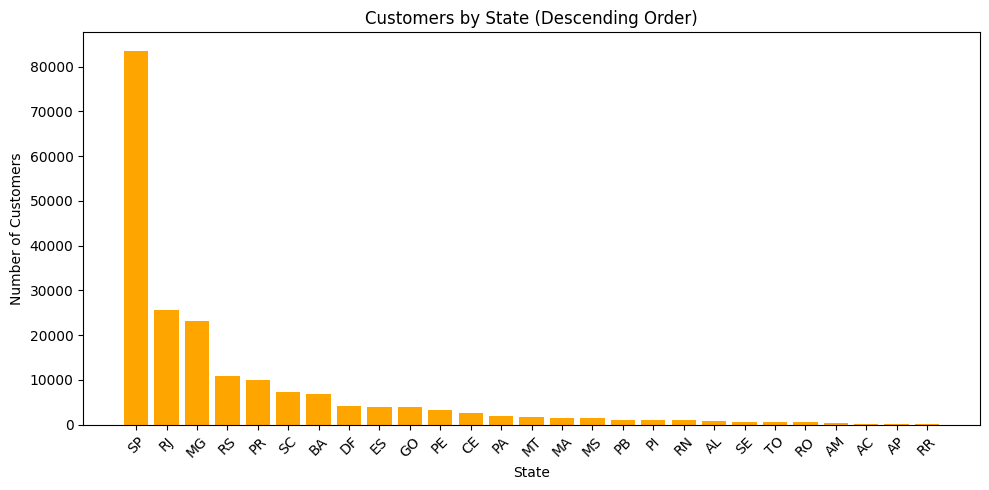

In [27]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 1. Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0987654321",
    database="ecommerce"
)

# 2. Create the cursor
cur = conn.cursor()

# 3. Run query sorted in descending order
query = """
SELECT customer_state, COUNT(customer_id) AS customer_count
FROM customers
GROUP BY customer_state
ORDER BY customer_count DESC
"""

cur.execute(query)
data = cur.fetchall()

# 4. Convert to DataFrame
df = pd.DataFrame(data, columns=["state", "customer_count"])

# 5. Plot
plt.figure(figsize=(10, 5))
plt.bar(df["state"], df["customer_count"], color="orange")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Customers by State (Descending Order)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Clean up
cur.close()
conn.close()


# Calcalute the number of orders per month in 2018

       Month  Order Count
0    January        14538
1   February        13456
2      March        14422
3      April        13878
4        May        13746
5       June        12334
6       July        12584
7     August        13024
8  September           32
9    October            8


C:\Users\parsh\AppData\Local\Temp\ipykernel_19096\1823995004.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Month", y="Order Count", data=df, palette="mako")


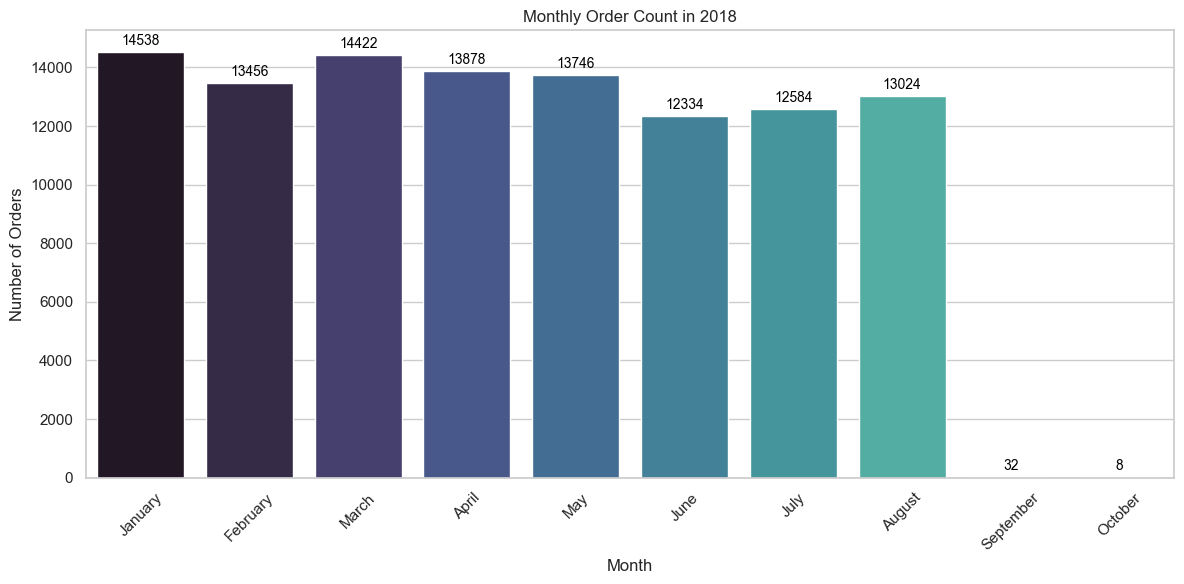

In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import mysql.connector

# Connect to database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0987654321",
    database="ecommerce"
)

cur = db.cursor()

# SQL query with proper month order
query = """
SELECT MONTHNAME(order_purchase_timestamp) AS month, COUNT(order_id) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp)
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["Month", "Order Count"])
print(df)

# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
bar_plot = sns.barplot(x="Month", y="Order Count", data=df, palette="mako")

# Add bar labels
for bar in bar_plot.patches:
    height = bar.get_height()
    bar_plot.annotate(f'{int(height)}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # Offset text slightly above the bar
                      textcoords="offset points",
                      ha='center', va='bottom', fontsize=10, color='black')

plt.title("Monthly Order Count in 2018")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close connection
cur.close()
db.close()


# Find the average number of products per order, grouped by customer city.


Top 10 Cities by Average Items per Order:

     Customer City Average Orders
    padre carvalho          28.00
       celso ramos          26.00
             datas          24.00
     candido godoi          24.00
    matias olimpio          20.00
        cidelandia          16.00
        curralinho          16.00
           picarra          16.00
morro de sao paulo          16.00
   teixeira soares          16.00


C:\Users\parsh\AppData\Local\Temp\ipykernel_19096\1471354883.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Customer City", y="Average Orders", palette="rocket")


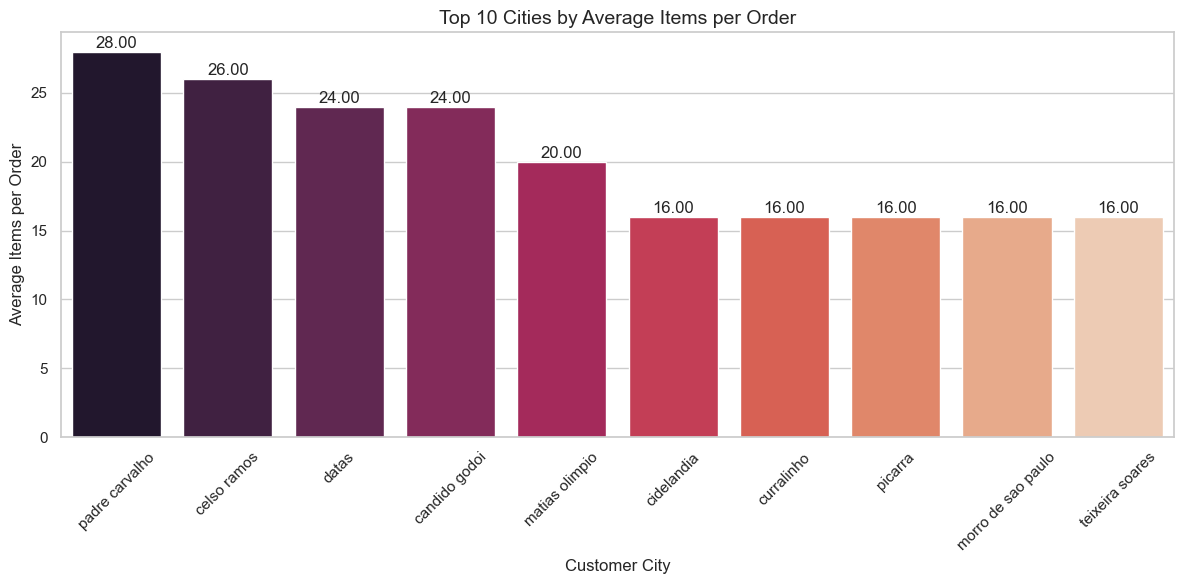

In [31]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import mysql.connector

# Connect to database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0987654321",
    database="ecommerce"
)

cur = db.cursor()

# SQL query
query = """
WITH count_per_order AS (
    SELECT 
        orders.order_id, 
        orders.customer_id, 
        COUNT(order_items.order_id) AS item_count
    FROM orders 
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT 
    customers.customer_city, 
    ROUND(AVG(count_per_order.item_count), 2) AS average_orders
FROM customers 
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city 
ORDER BY average_orders DESC;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Customer City", "Average Orders"])
top10 = df.head(10)

# ✅ Print output
print("\nTop 10 Cities by Average Items per Order:\n")
print(top10.to_string(index=False))

# ✅ Plot output
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Customer City", y="Average Orders", palette="rocket")

# Add value labels
for index, row in top10.iterrows():
    y = float(row["Average Orders"])
    plt.text(index, y + 0.05, f"{y:.2f}", ha='center', va='bottom')

plt.title("Top 10 Cities by Average Items per Order", fontsize=14)
plt.ylabel("Average Items per Order")
plt.xlabel("Customer City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clean up
cur.close()
db.close()


# Calculate the percentage of total revenue contributed by each product category 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

db = connect_db()
cur = db.cursor()


query = """SELECT 
    UPPER(products.product_category) AS category,
    ROUND(
        SUM(payments.payment_value) / 
        (SELECT SUM(payment_value) FROM payments) * 100, 
        2
    ) AS sales_percentage
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
ORDER BY sales_percentage DESC;

"""

cur.execute(query)

df = pd.DataFrame (data, columns = ["category", "percentage_distribution"])
df.head()


,category,percentage_distribution
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00


# Identify the correlation bettween product price and the number of times a product has been purchased

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

db = connect_db()
cur = db.cursor()

query = """
SELECT 
    products.product_category,
    COUNT(order_items.product_id) AS order_count,
    ROUND(AVG(order_items.price), 2) AS price
FROM products
JOIN order_items ON products.product_id = order_items.product_id
GROUP BY products.product_category;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["Category", "Order_Count", "Price"])
print("\n📦 Product Category Summary:\n")
print(df)

# Calculate correlation
arr1 = df["Order_Count"]
arr2 = df["Price"]
a = np.corrcoef(arr1, arr2)

# Display correlation matrix
print("\n🔗 Correlation Matrix between Order Count and Average Price:")
print(a)

# Print specific correlation value
print("\n🧠 The correlation between price and number of times a product has been purchased is:", round(a[0][1], 4))

# Close connection
cur.close()
db.close()





📦 Product Category Summary:

                        Category                      Order_Count   Price 
0                                      HEALTH BEAUTY     38680      130.16
1                                      sport leisure     34564      114.34
2                                         Cool Stuff     15184      167.36
3                               computer accessories     31308      116.51
4                                    Watches present     23964      201.14
5                                         housewares     27856       90.79
6                                        electronics     11068       57.91
7                                               None      6412      112.00
8                                               toys     16468      117.55
9                                     bed table bath     44460       93.30
10                                    Games consoles      4548      138.49
11                                        automotive     16940      13

# Calculate the total revenue generated by each seller, and rank them by revenue

C:\Users\parsh\AppData\Local\Temp\ipykernel_19096\707515654.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="Seller ID", y="Revenue", palette="crest")
C:\Users\parsh\AppData\Local\Temp\ipykernel_19096\707515654.py:53: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\parsh\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


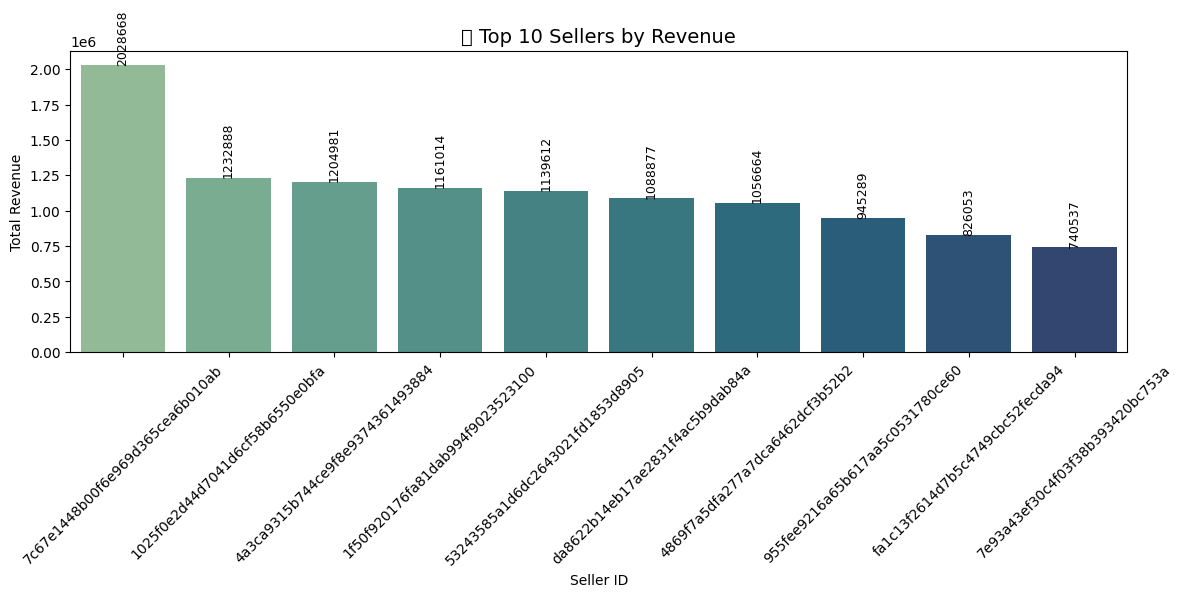

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect and run query
db = connect_db()
cur = db.cursor()

query = """
SELECT *, DENSE_RANK() OVER (ORDER BY revenue DESC) AS rn
FROM (
    SELECT 
        order_items.seller_id, 
        SUM(payments.payment_value) AS revenue
    FROM order_items 
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY order_items.seller_id
) AS a;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["Seller ID", "Revenue", "Rank"])

# Sort and get top 10
top10 = df.sort_values(by="Revenue", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Seller ID", y="Revenue", palette="crest")

# Add value labels
for index, row in top10.iterrows():
    plt.text(row["Seller ID"], row["Revenue"] + 1000, f'{row["Revenue"]:.0f}', 
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.title("💰 Top 10 Sellers by Revenue", fontsize=14)
plt.xlabel("Seller ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cur.close()
db.close()


# Calculate the moving average of order values for each customer over their order history

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect and run query
db = connect_db()
cur = db.cursor()

query = """
SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment_value,
    AVG(payment_value) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp 
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM (
    SELECT 
        orders.customer_id, 
        orders.order_purchase_timestamp,
        payments.payment_value
    FROM payments 
    JOIN orders ON payments.order_id = orders.order_id
) AS a;
"""

cur.execute(query)
data = cur.fetchall()

# Define column names
columns = ["Customer ID", "Order Timestamp", "Payment", "Moving Average"]
df = pd.DataFrame(data, columns=columns)

# Display DataFrame
print(df.head())



cur.close()
db.close()


                        Customer ID      Order Timestamp  Payment  \
0  00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26   114.74   
1  00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26   114.74   
2  00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26   114.74   
3  00012a2ce6f8dcda20d059ce98491703  2017-11-14 16:08:26   114.74   
4  000161a058600d5901f007fab4c27140  2017-07-16 09:40:32    67.41   

   Moving Average  
0      114.739998  
1      114.739998  
2      114.739998  
3      114.739998  
4       67.410004  


# Calulate the cumulative sales per month for each year

   Year  Month  Monthly Sales  Cumulative Sales
0  2016      9        1008.96           1008.96
1  2016     10      236361.92         237370.88
2  2016     12          78.48         237449.36
3  2017      1      553952.16         791401.52
4  2017      2     1167632.04        1959033.56


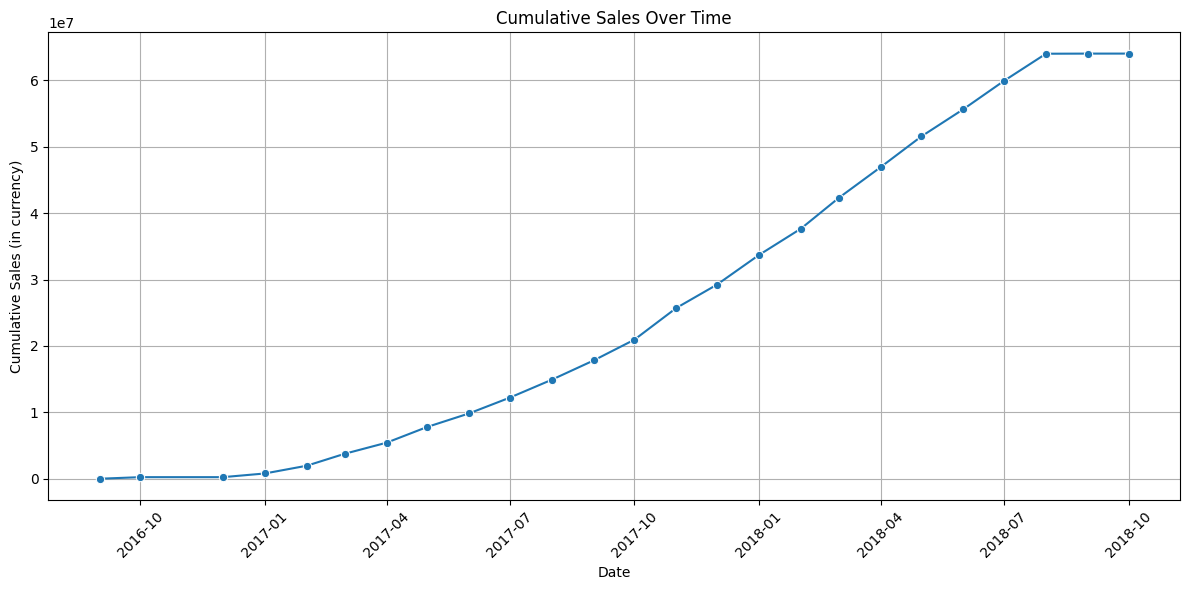

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect and run query
db = connect_db()
cur = db.cursor()

query = """
SELECT years, months, payment, 
       SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp), MONTH(orders.order_purchase_timestamp)
    ORDER BY years, months
) AS a;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame with column names
df = pd.DataFrame(data, columns=["Year", "Month", "Monthly Sales", "Cumulative Sales"])
print(df.head())

# Optional: create a time axis
df["Date"] = pd.to_datetime(df["Year"].astype(str) + '-' + df["Month"].astype(str).str.zfill(2))

# Plot cumulative sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Cumulative Sales", marker="o")
plt.title("Cumulative Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales (in currency)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

cur.close()
db.close()


#  Calculate the year-over-year growth rate of total sales.

   Year  YoY % Growth
0  2016           NaN
1  2017       12112.7
2  2018          20.0


C:\Users\parsh\AppData\Local\Temp\ipykernel_19096\1685789693.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Year", y="YoY % Growth", palette="crest")


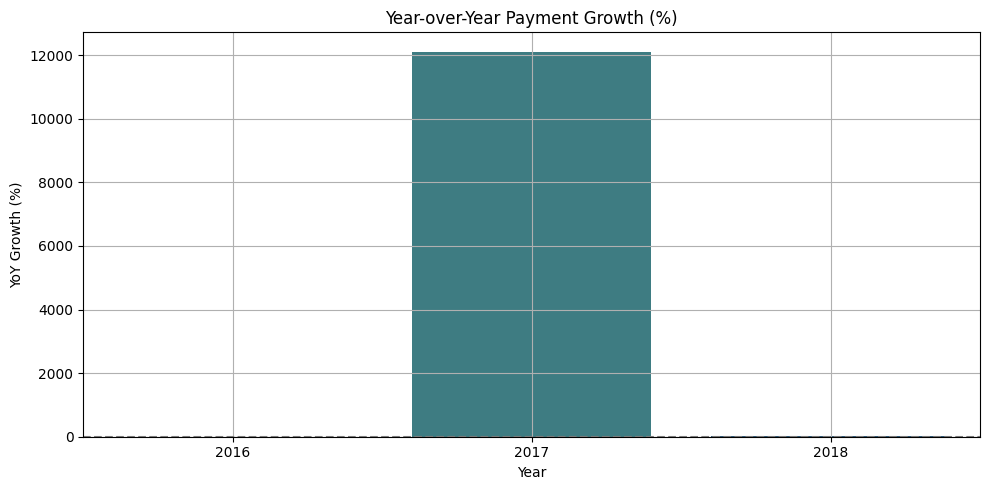

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect and run query
db = connect_db()
cur = db.cursor()

query = """
WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp)
    ORDER BY years
)

SELECT 
    years, 
    ROUND(((payment / LAG(payment, 1) OVER (ORDER BY years)) - 1) * 100, 2) AS yoy_growth_percentage
FROM a;
"""

cur.execute(query)
data = cur.fetchall()

# Corrected DataFrame constructor
df = pd.DataFrame(data, columns=["Year", "YoY % Growth"])
print(df)

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Year", y="YoY % Growth", palette="crest")
plt.title("Year-over-Year Payment Growth (%)")
plt.ylabel("YoY Growth (%)")
plt.xlabel("Year")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

cur.close()
db.close()


# Calulate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [19]:
import pandas as pd
import mysql.connector

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect and run query
db = connect_db()
cur = db.cursor()

query = """
WITH a AS (
    SELECT customers.customer_id,
           MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),
b AS (
    SELECT a.customer_id, 
           COUNT(DISTINCT orders.order_purchase_timestamp) AS repeat_orders
    FROM a
    JOIN orders ON orders.customer_id = a.customer_id
    WHERE orders.order_purchase_timestamp > a.first_order
      AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
)

SELECT 
    ROUND(100 * COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id), 2) AS repeat_customer_percentage
FROM a
LEFT JOIN b ON a.customer_id = b.customer_id;
"""

cur.execute(query)
data = cur.fetchall()

print("Repeat Customer % in First 6 Months:", data[0][0], "%")

cur.close()
db.close()


Repeat Customer % in First 6 Months: 0.00 %


# Identify the top 3 custommer who spent the most money in each year.

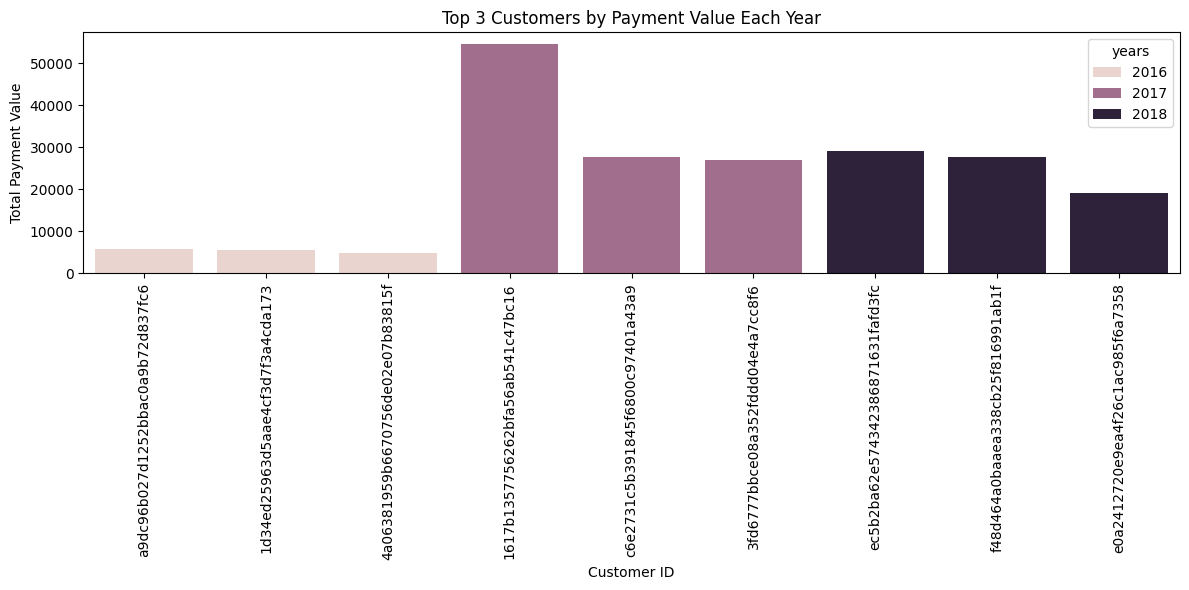

In [21]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Function to connect to the database
def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="0987654321",
        database="ecommerce"
    )

# Connect and run query
db = connect_db()
cur = db.cursor()

query = """
WITH ranked_customers AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (
            PARTITION BY YEAR(orders.order_purchase_timestamp)
            ORDER BY SUM(payments.payment_value) DESC
        ) AS d_rank
    FROM orders
    JOIN payments ON payments.order_id = orders.order_id
    GROUP BY years, orders.customer_id
)
SELECT years, customer_id, payment, d_rank
FROM ranked_customers
WHERE d_rank <= 3;
"""

cur.execute(query)
data = cur.fetchall()

# Creating DataFrame
df = pd.DataFrame(data, columns=["years", "id", "payment", "rank"])

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x="id", y="payment", hue="years", data=df)
plt.xticks(rotation=90)
plt.title("Top 3 Customers by Payment Value Each Year")
plt.ylabel("Total Payment Value")
plt.xlabel("Customer ID")
plt.tight_layout()
plt.show()

# Close connections
cur.close()
db.close()
